In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw06.ipynb")

# Homework 6

## Due on Gradescope


### Detailed Submission Instructions Are Provided at the end of this Notebook







## Collaboration Policy

Data science is a collaborative activity.  However a key step in learning and retention is **creating solutions on your own.**  

Please see the **Course Syllabus for the Collaboration Policy**.

On the other hand, the following are some **examples of things which would NOT usually be
considered to be cheating**:
 - Working on a HW problem on your own first and then discussing with a classmate a particular part in the problem solution where you are stuck.  After clarifying any questions you should then continue to write your solution independently.
 - Asking someone (or searching online) how a particular construct in the language works.
 - Asking someone (or searching online) how to formulate a particular construct in the language.
 - Asking someone for help in finding an error in your program.  
 - Asking someone why a particular construct does not work as you expected in a given program.
   

To test whether you are truly doing your own work and retaining what you've learned you should be able to easily reproduce from scratch and explain a HW solution that was your own when asked in office hours by an Instructor or on a quiz/exam.   


If you have difficulty in formulating the general solution to a problem on your own, or
you have difficulty in translating that general solution into a program, it is advisable to see
your instructor.

We are here to help!  Visit OH Hours and/or post questions on Piazza!

If while completing this assignment you reference any websites other than those linked in this assignment or provided on Canvas please list those references here:

**External references**:  *list any websites you referenced

#### Grading
Grading is broken down into autograded answers and manually graded answers. 

For autograded answers, the results of your code are compared to provided and/or hidden tests.

For manually graded answers you must show and explain all steps.  Graders will evaluate how well you answered the question and/or fulfilled the requirements of the question.


### Score breakdown



Question | Points | Grading Type
--- | --- | ---
Question 1 | 7 | autograded
Question 2 | 16 | manual
Question 3 | 10 | manual
Question 4abcdegh | 14 | manual
Question 4f | 3 | autograded
|Total | 50

<a id='top'></a>
---
**Shortcuts:**  [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | 
---
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />



In this HW we explore properties of probability distributions, both theoretically and through simulation.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### Question 1

Factorials and the *binomial coefficients* $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ get large very quickly as $n$ gets large. One way to compute them is to use the `SciPy` module `special`. `SciPy` is a collection of Python-based software for math, probability, statistics, science, and engineering.

In [3]:
from scipy import special

Below are some examples of `special.factorial`:

In [4]:
special.factorial(5)

special.factorial(range(1, 6))

array([  1.,   2.,   6.,  24., 120.])

Traditionally, subsets of $k$ individuals out of a population of $n$ individuals are called *combinations*, and so `special.comb(n, k)` evaluates to $\binom{n}{k}$. 

Note that we will always use the term *subsets* to mean un-ordered sets. We will use *permutations* in situations where we need to keep track of the order in which the elements appear.


Look at the code and output below carefully (including types) before starting Question 1.


https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html



In [5]:
special.comb(5, 3), special.factorial(5) / (special.factorial(3) * special.factorial(2))

(10.0, 10.0)

In [6]:
special.comb(5, range(6))

array([ 1.,  5., 10., 10.,  5.,  1.])

Consider a population in which a proportion $p$ of individuals are called "successes" (or 1, if you prefer) and the remaining proportion are rudely called "failures" (or 0).

As we saw in lecture, if you draw a sample of size $n$ (where $n$ is some positive integer) at random with replacement from the population, then the number of successes is a random variable that follows the binomial distribution. The probability of drawing $k$ successes and $n-k$ failures is $\binom{n}{k}p^k(1-p)^{n-k}$, for $0 \leq k \leq n$. To reduce writing, we will shorten "$k$ successes and $n-k$ failures" to "$k$ successes". In other words, "$k$ successes" means "exactly $k$ successes".

To formalize notation: if $X$ is the number of successes we draw, then $P(X = k) = \binom{n}{k}p^k(1-p)^{n-k}$.

### Question 1a) ###
Suppose you sample 100 times at random with replacement from a population in which 26% of the individuals are successes. Write a Python expression that evaluates to the chance that the sample has 20 successes. 

**Computational note:** Don't import any other libraries; just use the ones already imported and plug into the formula above. It's far from the best way numerically, but it is fine for the numbers involved in this Homework. 

In [7]:
n = 100  # number of trials
k = 20   # number of successes
p = 0.26 # probability of success

prob_1a = special.comb(n, k) * (p ** k) * ((1 - p) ** (n - k))
prob_1a

0.036911003560024636

In [8]:
grader.check("q1a")

q1a results: All test cases passed!

### Question 1b) ###
Complete the cell with a Python expression that evaluates to an array whose elements are the chances of $k$ successes for $k = 0, 1, 2, \ldots, 100$. That is, `all_probs[k]` should contain $P(X = k)$, where $X$ is the random variable describing the number of successes drawn from the scenario outlined above.

In [9]:
k = np.arange(101)
all_probs = special.comb(n, k) * (p ** k) * ((1 - p) ** (n - k))
np.round(all_probs, 4), sum(all_probs)

(array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.0001, 0.0003, 0.0007, 0.0016, 0.0033,
        0.0061, 0.0106, 0.0171, 0.0259, 0.0369, 0.0494, 0.0623, 0.0743,
        0.0837, 0.0894, 0.0906, 0.0873, 0.0799, 0.0697, 0.058 , 0.046 ,
        0.0349, 0.0252, 0.0175, 0.0116, 0.0073, 0.0045, 0.0026, 0.0015,
        0.0008, 0.0004, 0.0002, 0.0001, 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    ]),
 0.9999999999999994)

In [10]:
grader.check("q1b")

q1b results: All test cases passed!

Using the array of probability values we can plot a histogram of this discrete probability distribution as follows.

**NOTE:** We set the bin widths to be equal to 1 and add white lines between each value so that we can interpret area in the histogram as probabilities.

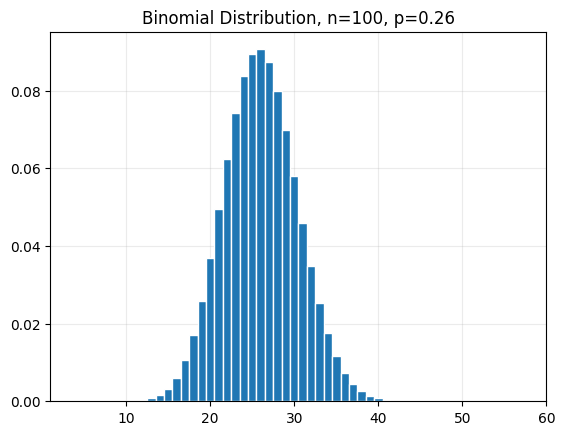

In [11]:
k = np.arange(101)
p = special.comb(100, k)*(0.26**k)*(0.74**(100-k))


fig, ax = plt.subplots()

ax.bar(k, p, width=1, ec='white');
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
plt.xlim(1,60)
plt.title("Binomial Distribution, n=100, p=0.26");



### Question 1c) ###


Complete the cell with an expression that evaluates to the chance that the number of successes in the sample is in the interval $26 \pm 10$ (inclusive on both sides). In other words, determine $P(16 \leq X \leq 36)$. **Hint: You might want to apply your Python indexing knowledge here.**

**Note: Please assign your answer to `prob_1c`. Because we use an autograder, please make sure your answer is a proportion between 0 and 1, not a percent between 0 and 100.**

In [12]:
prob_1c = np.sum(all_probs[16:37])

prob_1c

0.9838345682140125

In [13]:
grader.check("q1c")

q1c results: All test cases passed!

Consider (once again) a sample of size $n$ drawn at random with replacement from a population in which a proportion $p$ of the individuals are called successes.

Let $S$ be the random variable that denotes the number of successes in our sample. (As stated above, $S$ follows the binomial distribution.) Then, the probability that the number of successes in our sample is **at most** $s$ (where $0 \leq s \leq n$) is

$$P(S \leq s) = P(S = 0) + P(S = 1) + ... + P(S = s) = \sum_{k=0}^s \binom{n}{k}p^k(1-p)^{n-k}$$

We obtain this by summing the probability that the number of successes is exactly $k$, for each value of $k = 0, 1, 2, ..., s$.

### Question 1d) ###

Please fill in the function `prob_at_most` which takes $n$, $p$, and $s$ and returns $P(S \le s)$ as defined above. If the inputs are invalid: for instance, if $p > 1$ OR $s > n$ then return 0." 

It might help to refer to the calculation in Question 1b.

In [16]:
def prob_at_most(n, p, s):
    """
    Returns the probability of S <= s.
    Input n: sample size; p: proportion; s: number of successes at most
    """
    # Check if inputs are invalid
    if p > 1 or s > n:
        return 0
    
    # Calculate probabilities for each k from 0 to s
    k = np.arange(s + 1)
    probabilities = special.comb(n, k) * (p ** k) * ((1 - p) ** (n - k))
    
    return np.sum(probabilities)

In [17]:
grader.check("q1d")

q1d results: All test cases passed!

### Question 1e) ###
In an election, supporters of Candidate C are in a minority. Only 45% of the voters in the population favor the candidate.

Suppose a survey organization takes a sample of 200 voters at random with replacement from this population. Use `prob_at_most` to write an expression that evaluates to the chance that a majority (more than half) of the sampled voters favor Candidate C.

In [22]:
n = 200  # sample size
p = 0.45 # proportion favoring Candidate C

p_majority = 1 - prob_at_most(n, p, 100)
p_majority

0.06807524986263858

In [23]:
grader.check("q1e")

q1e results: All test cases passed!

### Question 1f) ###
Suppose each of five survey organizations takes a sample of voters at random with replacement from the population of voters in Part **b**, independently of the samples drawn by the other organizations. 

- Three of the organizations use a sample size of 200
- One organization uses a sample size of 300
- One organization uses a sample size of 400

Write an expression that evaluates to the chance that in at least one of the five samples the majority of voters favor Candidate C. You can use any quantity or function defined earlier in this exercise.

In [24]:
prob_1f = 1 - np.prod([(1 - (1 - prob_at_most(n, 0.45, n // 2))) for n in [200, 200, 200, 300, 400]])
prob_1f

0.2355036156844238

In [25]:
grader.check("q1f")

q1f results: All test cases passed!

***

[Back to top](#top)

<a id='p2'></a>

### Question 2 - Simulating Roulette


A Las Vegas roulette wheel contains 38 numbers $\{0, 00, 1, 2, \ldots, 36\}$. Of the non-zero numbers, 18 are red and 18 are black. You can place bets on various number/color combinations and each type of bet pays-out at a different rate.  For example: 

- If you bet $\$1$ on red (or black) and win, then you win $\$1$ (i.e. you get your original dollar back, plus another dollar). 
- If you bet $\$1$ any particular number and win, then you win $\$35$ (i.e you get your original dollar back, plus $\$35$). 
- If you bet $\$1$ on the first dozen (or second dozen, or third dozen) nonzero numbers and win, then you win $\$2$ (i.e. you get your original dollar back, plus another $\$2$. 

<img src="img/roulette_wheel.jpeg" width="330px">

It seems like there are so many ways to win!  In reality, some very careful probability theory was done by the game designers to ensure that there is not much difference in any particular payout.  We'll explore roulette both by simulation and by hand in this exercise. 

<!-- BEGIN QUESTION -->

### Question 2a) ### 

Let $X$ be a random variable that gives your winnings if you bet on red and the roulette wheel is spun once.   

i).  What is the probability distribution of $X$?  Give your answer as a table. 

ii).  Calculate the expected value of your winnings by betting on red.   


Write up your full solution in the SAME box below using LaTeX (not code).  Show all steps fully justifying your answer.  


### i) Probability Distribution of 𝑋

When betting on red in roulette, there are three possible outcomes for your winnings $X$:

Win: This happens if the ball lands on one of the 18 red numbers. Since there are 38 numbers in total on a roulette wheel, the probability of this happening is $\frac{18}{38}$.

Lose: This occurs if the ball lands on a black number or 0 or 00. There are 18 black numbers, and 2 green numbers (0 and 00), making a total of 20. So, the probability of losing $\frac{20}{38}$.

Thus, the probability distribution of \(X\), your winnings from betting on red, can be summarized as follows:

$X$ | $P(X)$
--- | ---
$+1$ | $\frac{18}{38}$
$-1$ | $\frac{20}{38}$

### ii) Expected Value of Winnings

The expected value (\(E[X]\)) of your winnings can be calculated using the probability distribution of \(X\):


$E[X] = (+1) \cdot P(X=+1) + (-1) \cdot P(X=-1)$

$= (+1) \cdot \frac{18}{38} + (-1) \cdot \frac{20}{38}$

$= \frac{18}{38} - \frac{20}{38}$

$= \frac{-2}{38}$

$= -\frac{1}{19}$

Therefore, the expected value of your winnings by betting on red is $-\frac{1}{19}$ dollars. This means that, on average, you lose a little over 5 cents for each dollar you bet on red in the long run.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2b) ### 

Let's simulate this.  In the first code box below, write code to simulate one spin of a roulette wheel.  Your output should be a string in the form of the number then the color (i.e. `18R` or `00G`) 

In the 2nd code box below, write code that takes the number of spins and either the color red or black as input, calculates winnings for each spin assuming you bet on that color for all spins, and then outputs the average winnings out of those spins.  

Then run the simulation 3 different times for `num_spins` = 100,000  and compare to your answer from part A.

**To receive credit you must write your code such that all lines are visible in your PDF output.**

In [39]:
import random

def spin_roulette():
    # Map numbers to colors
    number = random.randint(0, 37)  # Simulate the spin
    if number == 37:  # Treat "37" as "00"
        return "00G"
    color = "R" if number % 2 == 0 and not (11 <= number <= 18 or 29 <= number <= 36) else "B"
    if number == 0:
        color = "G"  # 0 is green
    return f"{number}{color}"
# Your code above this line
spin_roulette()

'12B'

In [40]:
def color_winnings(color='R', num_spins=100000):
    # Initialize variables
    winnings = 0
    
    # Define the roulette wheel
    numbers = ["0", "00"] + [str(i) for i in range(1, 37)]
    colors = ["G", "G"] + ["R" if i % 2 != 0 else "B" for i in range(1, 37)]
    
    for _ in range(num_spins):
        # Simulate a spin
        import random
        index = random.randint(0, 37)
        spin_color = colors[index]
        
        # Calculate winnings
        if color == spin_color:
            winnings += 1  # Win $1
        else:
            winnings -= 1  # Lose $1
            
    # Calculate average winnings
    return winnings / num_spins
# Your code above this line 
print("E[Winnings] = {:.3f}".format(color_winnings(color="R", num_spins=int(1e6))))
print("E[Winnings] = {:.3f}".format(color_winnings(color="R", num_spins=int(1e6))))
print("E[Winnings] = {:.3f}".format(color_winnings(color="R", num_spins=int(1e6))))

E[Winnings] = -0.052
E[Winnings] = -0.051
E[Winnings] = -0.055


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2c) ### 

In Roulette you can bet on one of three "dozens" segments, called 1st 12, 2nd 12, and 3rd 12. They cover 1-12, 13-24, and 25-36, respectively.   If you bet $\$1$ on the first dozen (or second dozen, or third dozen) nonzero numbers and win, then you win $\$2$ (i.e. you get your original dollar back, plus another $\$2$. 


Let $Y$ be a random variable that gives your winnings if you bet on any one of the three "dozen" nonzero numbers and the roulette wheel is spun once.  

i).  What is the probability distribution of $Y$?  Give your answer as a table. 

ii).  What is $E[Y]$?

Write up your full solution in the SAME box below using LaTeX (not code).  Show all steps fully justifying your answer.  

i) Probability Distribution of Y

When you bet on any one of the "dozen" segments (1st 12, 2nd 12, or 3rd 12), there are two possible outcomes:

Win: This occurs if the ball lands on one of the numbers in the dozen you bet on. Since each dozen covers 12 numbers and there are 38 numbers in total on the roulette wheel (including 0 and 00 which are not part of any dozen), the probability of winning is $\frac{12}{38}$.

Lose: This happens if the ball lands on any of the other numbers, including 0 and 00. Since there are 26 numbers that are not in your chosen dozen (24 from the other two dozens plus 0 and 00), the probability of losing is $\frac{26}{38}$.

The winnings $Y$ can be defined as follows:

$Y = +2$ dollars if you win (you get your original dollar back plus another 2 dollars).
$Y = -1$ dollar if you lose (you lose your original dollar).

The probability distribution of $Y$ can be summarized in the table below:
$Y$     | $P(Y)$
------|--------
$+2$    | $12/38$
$-1$    | $26/38$

ii) Expected Value of $Y$

The expected value $E[Y]$ of the winnings can be calculated using the probability distribution of $Y$:

$E[Y] = (+2) \cdot P(Y=+2) + (-1) \cdot P(Y=-1)$


Substituting the probabilities:

$E[Y] = (+2) \cdot \frac{12}{38} + (-1) \cdot \frac{26}{38}$

$E[Y] = \frac{24}{38} - \frac{26}{38}$

$E[Y] = \frac{-2}{38}$

$E[Y] = -\frac{1}{19}$

Therefore, the expected value of your winnings by betting on any one of the three "dozen" segments is $-\frac{1}{19}$ dollars. This means that, on average, you lose a little over 5 cents for each dollar bet on a "dozen" segment in the long run. This analysis further illustrates the inherent house advantage designed into the game of roulette.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2d) ### 

Write code to simulate `num_spins` spins, record the winnings for each spin if you bet on the first dozen nonzero numbers, and calculate the average winnings out of the total spins.

Then run the simulation 3 different times for `num_spins` = 100,000  and compare to your answer from part C.  


In [41]:
def dozen_winnings(num_spins):
    # Initialize variables
    winnings = 0
    
    # Simulate spins
    for _ in range(num_spins):
        # Simulate a spin
        spin_result = random.randint(1, 38)  # Account for 0, 00, and 1-36
        
        # Check if the spin result is in the first dozen
        if 1 <= spin_result <= 12:
            winnings += 2  # Win $2
        else:
            winnings -= 1  # Lose $1
    
    # Calculate average winnings
    return winnings / num_spins
# Your code above this line
    
print("E[Winnings] = {:.3f}".format(dozen_winnings(num_spins=100000)))
print("E[Winnings] = {:.3f}".format(dozen_winnings(num_spins=100000)))
print("E[Winnings] = {:.3f}".format(dozen_winnings(num_spins=100000)))


E[Winnings] = -0.051
E[Winnings] = -0.055
E[Winnings] = -0.051


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

 ### Question 2e) ###  
Recall, we showed in class that the expected winnings if you bet on any number is also $-\dfrac{1}{19}$.    

So  you're hopefully onto the pattern by now.  The payouts in Roulette are designed so that the expected payout for a winning bet is always $-\dfrac{1}{19}$.  

Since we define these payouts in terms of your winnings after betting $1, we can think of these as payout odds.  

For example, since if you bet $\$1$ on the first dozen nonzero numbers and win, then you win $\$2$, we say the odds are 2 to 1 (denoted 2:1).   

The odds are 35:1 for landing on any particular number.  This means if you bet $\$1$, you’ll win $35.
 
 
Suppose the casino wanted to develop odds for a new bet in Roulette, where they allow you to bet on any set of 3 different numbers.   Let the odds for this new bet be $$x:1$$ What should $x$ be so that the expected payout for a winning bet is still $-\dfrac{1}{19}$?.

Show your work using LaTeX below.  

You bet 1 on a set of 3 different numbers.
If you win, you receive your original 1 dollar back plus an additional $x$ dollars, giving you $x + 1$ dollars in total.
The probability of winning this bet is $\frac{3}{38}$, since there are 3 winning numbers out of 38 possible outcomes.
The probability of losing the bet is $\frac{35}{38}$, as there are 35 other numbers that do not match your bet.

The expected value $E[Y]$ of the winnings can be defined as:

$E[Y] = (\text{winnings on win} \times \text{probability of win}) + (\text{winnings on loss} \times \text{probability of loss})$

Substituting the values we have:

$E[Y] = ((x + 1) \times \frac{3}{38}) + (-1 \times \frac{35}{38})$

We know that the expected value $E[Y]$ should be $-\frac{1}{19}$ for the bet to be fair according to the casino's standard. Therefore, we set $E[Y]$ to $-\frac{1}{19}$ and solve for $x$:

$-\frac{1}{19} = ((x + 1) \times \frac{3}{38}) - \frac{35}{38}$

To solve for $x$, we first simplify the equation:

$-\frac{1}{19} = \frac{3x + 3}{38} - \frac{35}{38}$

Bringing all terms to one side and simplifying:

$\frac{3x - 32}{38} = -\frac{1}{19}$

Multiplying both sides by 38:

$3x - 32 = -2$

Solving for \(x\):

$3x = 30$

$x = 10$

Therefore, for the expected payout for a winning bet to be $-\frac{1}{19}$, the odds for betting on any set of 3 different numbers should be set at $10:1$. This means if you bet 1 dollar on any set of 3 numbers and win, you should win 10 dollars, receiving back your original dollar plus an additional $10.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

 ### Question 2f) ###  
Let's generalize this!   

Define a function $x(n)$ that describes the odds the casino should give for betting $\$1$ on any set of $n$ numbers if the casino wants to keep the expected payout for a winning bet at $-\frac{1}{19}$ for any $n$.   (For example, the odds for betting on any 3 different numbers should be set at $x(3)$ to $1$.  The odds for betting on any 4 different numbers should be set at $x(4)$ to $1$).    


Given:
$n$ is the number of numbers you're betting on.
The odds given by the casino are $x(n):1$, meaning if you win, you get $x(n)$ dollars plus your original 1 back.
The probability of winning is $\frac{n}{38}$ since you are betting on $n$ numbers out of 38.
The probability of losing is $\frac{38 - n}{38}$ since there are $38 - n$ numbers that you did not bet on.
The expected value of the winnings $E[Y]$ should be $-\frac{1}{19}$ according to the casino's standard.

The formula for $E[Y]$ in terms of $x(n)$ is:

$E[Y] = (x(n) + 1) \cdot \frac{n}{38} + (-1) \cdot \frac{38 - n}{38}$

Setting $E[Y]$ equal to $-\frac{1}{19}$ and solving for $x(n)$ gives:

$-\frac{1}{19} = (x(n) + 1) \cdot \frac{n}{38} - \frac{38 - n}{38}$

Multiplying both sides by 38 to eliminate the denominator and simplifying gives:

$-2 = n \cdot (x(n) + 1) - (38 - n)$


Solving for $x(n)$ yields:

$n \cdot x(n) + n = 36 + n$


$n \cdot x(n) = 36$


$x(n) = \frac{36}{n}$


Therefore, the function $x(n)$ that describes the odds the casino should give for betting 1 on any set of $n$ numbers, to keep the expected payout for a winning bet at $-\frac{1}{19}$, is:


$x(n) = \frac{36}{n}$


This formula provides the odds for any number of bets $n$, ensuring the casino maintains its expected payout rate.

<!-- END QUESTION -->

***

[Back to top](#top)

<a id='p3'></a>

### Question 3


Consider the discrete random variable $X$, with probability distribution given by $P(X=k) = 2ak^2-2ak$ for $k = 2, 3, 4$, where $a$ is a constant.


<!-- BEGIN QUESTION -->

Answer all of the parts below in the SAME cell below using LaTeX.  Show all of your steps.  

**3a**).  Determine the value of $a$ such that this defines a valid probability distribution.  Use that value for the rest of the problem.  

**3b**).  Calculate $P(X\leq3)$.

**3c**).  What is $E[X]$? (Show steps calculating this).

**3d**).  What is the standard deviation of $X$? (Show all steps calculating this).

Answer all of the parts above in SINGLE cell provided below using LaTeX.

3a)

The sum of probabilities for $X = 2, 3, 4$ is:

$1 = P(X=2) + P(X=3) + P(X=4)$

$= 2a(2^2) - 2a(2) + 2a(3^2) - 2a(3) + 2a(4^2) - 2a(4)$

$= 2a(4 - 2 + 9 - 3 + 16 - 4)$

$= 2a(20)$

$= 40a$

Solving $40a = 1$ gives $a = \frac{1}{40}$.

3b)

To calculate $P(X \leq 3)$, sum the probabilities of $X$ taking values less than or equal to 3:

$P(X \leq 3) = P(X=2) + P(X=3)$

$= 2 \cdot \frac{1}{40}(2^2 - 2) + 2 \cdot \frac{1}{40}(3^2 - 3)$

$= \frac{1}{20}(4 - 2) + \frac{1}{20}(9 - 3)$

$= \frac{1}{20}(2 + 6)$

$= \frac{8}{20}$

$= \frac{2}{5}$

3c)

The expected value $E[X]$ is calculated as:


$E[X] = \sum_{k=2}^{4} k \cdot P(X=k)$

$E[X] = 2 \cdot P(X=2) + 3 \cdot P(X=3) + 4 \cdot P(X=4)$


With $a=\frac{1}{40}$, we calculate each $P(X=k)$ as follows:

For $k=2$: $P(X=2) = 2 \cdot \frac{1}{40}(2^2 - 2) = \frac{1}{10}$
For $k=3$: $P(X=3) = 2 \cdot \frac{1}{40}(3^2 - 3) = \frac{3}{10}$
For $k=4$: $P(X=4) = 2 \cdot \frac{1}{40}(4^2 - 4) = \frac{6}{10}$

Substituting these into $E[X]$:

$E[X] = 2 \cdot \frac{1}{10} + 3 \cdot \frac{3}{10} + 4 \cdot \frac{6}{10} = \frac{2}{10} + \frac{9}{10} + \frac{24}{10} = \frac{35}{10} = 3.5$



3d)

The variance $Var(X)$ is given by $E[X^2] - (E[X])^2$. First, we find $E[X^2]$:

$E[X^2] = 2^2 \cdot P(X=2) + 3^2 \cdot P(X=3) + 4^2 \cdot P(X=4)$


Substituting the probabilities:

$E[X^2] = 4 \cdot \frac{1}{10} + 9 \cdot \frac{3}{10} + 16 \cdot \frac{6}{10} = \frac{4}{10} + \frac{27}{10} + \frac{96}{10} = \frac{127}{10} = 12.7$

Now, calculating the variance:

$Var(X) = E[X^2] - (E[X])^2 = 12.7 - (3.5)^2 = 12.7 - 12.25 = 0.45$

The standard deviation $\sigma_X$ is the square root of the variance:

$\sigma_X = \sqrt{Var(X)} = \sqrt{0.45} \approx 0.67$



<!-- END QUESTION -->

To check your answers to 3c and 3d, enter them below.  Note that this autograder test is not worth any points, it's just for you to check your work above to make sure you're on the right track. 

In [50]:
expected_value = 3.5
standard_deviation= np.sqrt(0.45)

In [51]:
grader.check("q3_check")

q3_check results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 3e

Plot a histogram of the discrete probability distribution for $X$.  

Use the same plotting guidelines as shown in Problem 1 so we can interpret area in the histogram as representing probability: 
 - Set the bin widths to be equal to 1 
 - Add white lines between each bar 

**Be sure to include a title on your plot.**


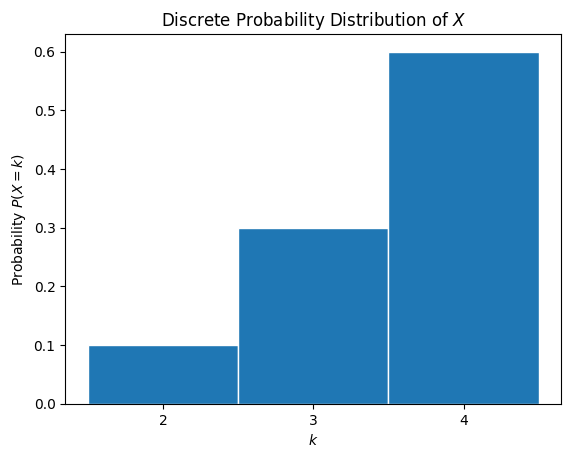

In [53]:
import matplotlib.pyplot as plt
import numpy as np
k = np.array([2, 3, 4])

# Given a = 1/40
a = 1/40

# Calculating probabilities P(X=k) for each k
probabilities = 2*a*k**2 - 2*a*k

plt.bar(k, probabilities, width=1, edgecolor='white')

plt.title('Discrete Probability Distribution of $X$')
plt.xlabel('$k$')
plt.ylabel('Probability $P(X=k)$')
plt.xticks(k)

plt.show()
# Your code for the histogram above this line


<!-- END QUESTION -->

***

[Back to top](#top)

<a id='p4'></a>


### Question 4
You are waiting in line at the grocery store. It is taking _forever_!  There are only two lines open; one is being tended by a cashier named [John Henry](https://en.wikipedia.org/wiki/John_Henry_(folklore)), and the other is tended by a [self check-out machine](https://theconversation.com/the-economics-of-self-service-checkouts-78593). Like all human beings when they arrive at the front of the store to check-out and encounter lines everywhere, you first experience a moment of intense panic. _Which line will be the fastest?_ you wonder, as people shuffle around you.

You decide you need to model the arrival of customers at the front of each of the lines.  From your Intro to Data Science class you remember that the distribution of independent random arrivals is often modeled using a Poisson distribution.  You observe the following:
* John's line checks-out an average of 4 customers per ten minutes,
* the self check-out machine checks-out an average of 5 customers per ten minutes **if** the machine is working properly, 
* the self check-out machine checks-out an average of 1 customer per ten minutes if the machine is freezing up, and
* in any given moment, the self check-out machine has a probability of 0.1 of freezing up.

Answer the following questions about this scenario. 

<!-- BEGIN QUESTION -->

Answer all of the parts below in the SAME cell below using LaTeX.  Show all of your steps.  

**4a**).  What is the probability that exactly 6 customers pass through John's line in the next 10 minutes? 

**4b**).  What is the probability that exactly 6 customers pass through the self check-out in the next 10 minutes, assuming that it is working?  

**4c**).  What is the probability that exactly 6 customers pass through the self check-out in the next 10 minutes, assuming that it is frozen? 

**4d**).  Use your results from 4b and 4c and the Law of Total Probability to calculate the probability that the self check-out tends exactly 6 customers in the next 10 minutes.
Show all steps using LaTeX.

Answer all of the parts above in SINGLE cell provided below using LaTeX.


$P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!}$

where $\lambda$ is the average rate of success, $k$ is the exact number of successes, and $e$ is Euler's number (approximately 2.71828).

4a) For John's line, with an average of 4 customers per ten minutes, the probability of exactly 6 customers is:

$P(X=6) = \frac{4^6 e^{-4}}{6!} = \frac{4096 e^{-4}}{720} \approx 0.1042$


4b) For the self check-out working properly, with an average of 5 customers per ten minutes, the probability of exactly 6 customers is:

$P(X=6) = \frac{5^6 e^{-5}}{6!} = \frac{15625 e^{-5}}{720} \approx 0.1462$


4c) For the self check-out when it's frozen, with an average of 1 customer per ten minutes, the probability of exactly 6 customers is:

$P(X=6) = \frac{1^6 e^{-1}}{6!} = \frac{1 e^{-1}}{720} \approx 0.000151$


4d) To find the overall probability of exactly 6 customers passing through the self check-out in the next 10 minutes, we use the Law of Total Probability. Let $A$ be the event that the machine is working, and $B$ the event that the machine is frozen. The probability that exactly 6 customers pass through is:

$P(X=6) = P(X=6|A)P(A) + P(X=6|B)P(B)$

Given that $P(A) = 0.9$ (probability machine is working) and $P(B) = 0.1$ (probability machine is frozen), we substitute the values from 4b and 4c:

$P(X=6) = (0.1462)(0.9) + (0.000151)(0.1) \approx 0.1316 + 0.0000151 \approx 0.1316$
Thus, the probability that exactly 6 customers pass through the self check-out in the next 10 minutes, considering both working and frozen states, is approximately 0.1316.


<!-- END QUESTION -->

To check your answer to 4d, enter it below.  Note that this autograder test is not worth any points, it's just for you to check your work above to make sure you're on the right track. 

In [54]:
q4d_check = 0.1316

q4d_check

0.1316

In [55]:
grader.check("q4d_check")

q4d_check results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 4e) ###
S'pose John is working a 5-hour shift from 4-9 PM after school. He gets no breaks, because the year is 1870 and worker's rights is not yet a thing.  

Plot a histogram of the probability distribution of the number of customers he serves in his 5 hour shift.   
For the **domain of the histogram, include $x$ values between $75$ and $160$ in your plot.**

**Hint:** Python has a built-in function to calculate the Poisson distribution for different values of $\mu$.  See the documentation for `poisson.pmf` in `scipy.stats`  (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)

**Hint:**  Since we are changing the time interval over which we are counting customers, you will need to update the parameter $\mu$ in the Poisson distribution to be the average number of customers John can serve in a $5$-hour shift. You can assume that his rate of 4 customers per 10 minutes scales up consistently during his 5 hour shift.  



In [57]:
from scipy.stats import poisson

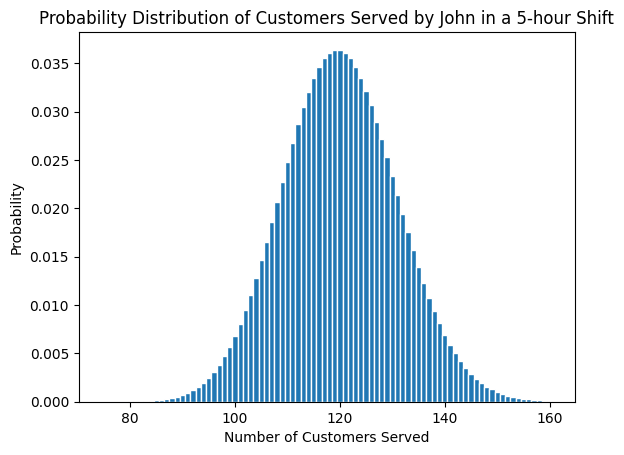

In [58]:
# John serves 4 customers per 10 minutes. In 5 hours (300 minutes), he can serve:
mu = 4 * (300 / 10)  # 4 customers every 10 minutes for 300 minutes

# Domain of the histogram
x = np.arange(75, 161)  # Including 160

# Calculate the Poisson PMF for these values
pmf = poisson.pmf(x, mu)

# Plotting the histogram
plt.bar(x, pmf, width=1, edgecolor='white')
plt.title("Probability Distribution of Customers Served by John in a 5-hour Shift")
plt.xlabel("Number of Customers Served")
plt.ylabel("Probability")

plt.show()

<!-- END QUESTION -->

### Question 4f) ###

Calculate  the probability that John serves 100 or more customers during his **5-hour** shift.  Note for this problem do the calculation of the actual probability, not a simulation.   Assign your output to the variable `prob_100_or_more`.
Assume we can safely scale our data assumptions up to a 5-hour interval.



In [59]:
# John's rate for 5 hours, already calculated as mu
mu = 4 * (300 / 10)  # 4 customers every 10 minutes for 300 minutes

# Calculate the probability of serving 100 or more customers
prob_100_or_more = 1 - poisson.cdf(99, mu)  # P(X >= 100) = 1 - P(X <= 99)
prob_100_or_more

0.9721362601094794

In [60]:
grader.check("q4f")

q4f results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 4g) 

Time to simulate!

Recall from lecture that if the number of random events follows a Poisson distribution, the lapse of time between these events follows an Exponential distribution.   For example, if the number of occurrences per 10 minute interval is 
distributed $X$~ $Pois(4)$, 
then the time (in units of 10 minutes) between arrivals is $Y$ ~ $Exp(4)$.  
 
We're going to simulate the number of customers served using this knowledge.  

i).  Write a function `checkout_count` to simulate the number of customers served by the **self check-out machine** in a **5-hour** shift. 

Your function should take as input the time length `time_len`, for calculating the arrivals, the working and broken customer arrival rate parameters (based on the time length given), and the probability, `p` that the machine is working properly. 


Your function should simulate customer arrival times at the front of the line by sampling between-customer times from $Exp(\lambda)$ via Numpy's [random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) function, where the argument $\lambda$ will depend on the state of the machine (working or broken).   Read the documentation carefully for the format of the input for the exponential function in Numpy. 

Your simulation should model the arrival of each new customer, and sample whether or not the machine is working properly for each new customer. 


Your function should **return the number of customer arrivals in a 5-hour shift**. 

**Make sure all code is visible in your PDF, or you won't receive points for this problem**


ii).  Use 10,000 simulations of this function to estimate the probability of the self check-out machine serves 100 or more customers in a 5-hour shift, and report your result.

iii). Finally, use 10,000 simulations of **this same function** to verify your answer to **Part 4e**.



In [61]:
def checkout_count(time_len, rate_work, rate_broken, p):
    total_customers = 0
    time_elapsed = 0
    
    # Convert rates to lambda for the exponential distribution (customers per minute)
    lambda_work = rate_work / 10  # Convert from per 10 minutes to per minute
    lambda_broken = rate_broken / 10  # Convert from per 10 minutes to per minute
    
    while time_elapsed < time_len:
        # Determine the state of the machine
        machine_working = np.random.rand() < p
        if machine_working:
            # Sample time until next customer for working machine
            time_to_next_customer = np.random.exponential(1/lambda_work)
        else:
            # Sample time until next customer for broken machine
            time_to_next_customer = np.random.exponential(1/lambda_broken)
        
        time_elapsed += time_to_next_customer
        if time_elapsed < time_len:
            total_customers += 1
    
    return total_customers
    

In [62]:
# Part ii
simulations = 10000
successes = sum([checkout_count(300, 5, 1, 0.9) >= 100 for _ in range(simulations)])
prob_100_or_more_simulated = successes / simulations

prob_100_or_more_simulated
# Your code for part ii above this line
# Output should be approximately 0.70 if code is correct.

0.7018

In [67]:
# Simulating 10,000 shifts for John's checkout line
john_simulations = 10000
john_successes = sum([checkout_count(300, 4, 0, 1) for _ in range(john_simulations)])

# Calculate the average number of customers served
average_customers_served_by_john = john_successes / john_simulations

average_customers_served_by_john
# Your code for part iii above this line
# Output should match your theoretical answer to Part 4f

120.0478

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**QUESTION 4h:** Comment on the results you found above in **Parts F and G** comparing the probabilities that John and the self check-out machine will serve 100 or more customers in a 5-hour block. Which seems like a better investment for the grocery store?  Justify your answer.

While the self check-out machine shows a good probability of serving 100 or more customers in a 5-hour block, its reliability is a concern due to the possibility of freezing. John, on the other hand, demonstrates consistent performance with a high average number of customers served at around 120 customers, suggesting a better investment for the grocery store in terms of reliability, customer satisfaction, and potentially lower maintenance and troubleshooting costs associated with technical issues in machines.

Therefore, while self check-out machines can automate the checkout process, especially during peak times, investing in reliable and efficient human cashiers like John seems to be a more dependable choice for maintaining high customer service standards and operational reliability.


<!-- END QUESTION -->

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You have finished Homework 6!

If you discussed this assignment with any other students in the class (in a manner that is acceptable as described by the Collaboration policy above) please **include their names** here:

**Collaborators**: *list collaborators here*

### Submission Instructions

Before proceeding any further, **save this notebook.**

After running the `grader.export()` cell provided below, **2 files will be created**: a zip file and pdf file.  You can download them using the links provided below OR by finding them in the same folder where this juptyer notebook resides in your JuptyerHub.

To receive credit on this assignment, **you must submit BOTH of these files
to their respective Gradescope portals:** 

* **Homework 6 Autograded**: Submit the zip file that is output by the `grader.export()` cell below to the HW6 Autograded assignment in Gradescope.

* **Homework 6 Manually Graded**: Submit your hw06.PDF to the HW6 Manually Graded assignment in Gradescope.  **YOU MUST SELECT THE PAGES CORRESPONDING TO EACH QUESTION WHEN YOU UPLOAD TO GRADESCOPE.  IF NOT, YOU WILL LOSE POINTS**   Also, **check** that all of your plots **and** all lines of your code are showing up in your PDF before submitting.  If not, you will not receive credit for your plots/code.  


**You are responsible for ensuring your submission follows our requirements. We will not be granting regrade requests nor extensions to submissions that don't follow instructions.** If you encounter any difficulties with submission, please don't hesitate to reach out to staff prior to the deadline.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

AFTER running the cell below, click on <a href='hw06.pdf' download>this link to download the PDF </a> to upload to Gradescope.  There will be a separate link that appears after running the cell below with a link to download the zip file to upload to Gradescope.

In [68]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q1a results: All test cases passed!

    q1b results: All test cases passed!

    q1c results: All test cases passed!

    q1d results: All test cases passed!

    q1e results: All test cases passed!

    q1f results: All test cases passed!

    q3_check results: All test cases passed!

    q4d_check results: All test cases passed!

    q4f results: All test cases passed!
